Saving traffic_congestion.csv to traffic_congestion (4).csv

Available Columns:
['sensor_count', 'avg_speed', 'time_of_day', 'congestion_level']

Auto-detected target column: congestion_level

Encoded Classes:
{'high': np.int64(0), 'low': np.int64(1), 'medium': np.int64(2)}

Evaluation Metrics:
Accuracy: 0.40
Precision: 0.40
Recall: 0.40

Classification Report:
              precision    recall  f1-score   support

        high       0.25      0.25      0.25         4
         low       0.44      0.57      0.50         7
      medium       0.43      0.33      0.38         9

    accuracy                           0.40        20
   macro avg       0.37      0.38      0.38        20
weighted avg       0.40      0.40      0.39        20



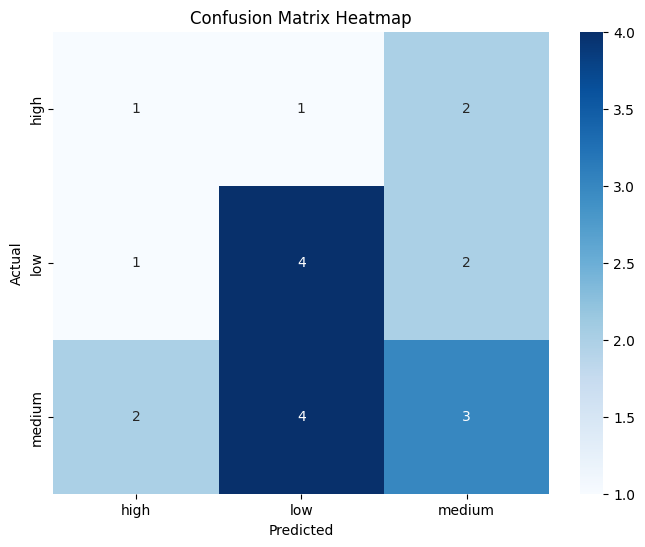


Enter values for a new road section to predict congestion level:
Enter value for 'sensor_count': 12
Enter value for 'avg_speed': 20
Enter value for 'time_of_day_afternoon': 12
Enter value for 'time_of_day_evening': 15
Enter value for 'time_of_day_morning': 10
Enter value for 'time_of_day_night': 12

🟢 Predicted Congestion Level: *high*


In [6]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Step 2: Upload CSV File
from google.colab import files
uploaded = files.upload()

# Step 3: Load Dataset
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Step 4: Clean Column Names
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces

# Step 5: Print Column Names for Reference
print("\nAvailable Columns:")
print(df.columns.tolist())

# Step 6: Try to Detect Target Column
possible_target_cols = [col for col in df.columns if 'congestion' in col.lower()]
if possible_target_cols:
    target_col = possible_target_cols[0]
    print(f"\nAuto-detected target column: {target_col}")
else:
    raise ValueError("Couldn't detect the target column. Please check the column name manually.")

# Step 7: Encode Target Column
label_encoder = LabelEncoder()
df[target_col] = label_encoder.fit_transform(df[target_col])
print("\nEncoded Classes:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Step 8: Define Features and Target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Optional: Handle non-numeric features
X = pd.get_dummies(X)

# Step 9: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10: Train Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 11: Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Step 12: Confusion Matrix and Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
# Step 13: Predict on a New Sample Input
print("\nEnter values for a new road section to predict congestion level:")

# Get feature columns after encoding
input_columns = X.columns.tolist()

# Get input from user
sample_input = []
for col in input_columns:
    val = input(f"Enter value for '{col}': ")
    try:
        sample_input.append(float(val))
    except ValueError:
        sample_input.append(val)  # For categorical fields

# Create DataFrame from user input
sample_df = pd.DataFrame([sample_input], columns=input_columns)

# Ensure categorical inputs are encoded the same way as training data
# If one-hot encoding was used earlier, re-align
sample_df = pd.get_dummies(sample_df)

# Add any missing columns (that existed during training)
for col in X.columns:
    if col not in sample_df.columns:
        sample_df[col] = 0  # add missing columns with 0

# Reorder columns to match training data
sample_df = sample_df[X.columns]

# Make Prediction
sample_pred = model.predict(sample_df)[0]
predicted_label = label_encoder.inverse_transform([sample_pred])[0]

print(f"\n🟢 Predicted Congestion Level: *{predicted_label}*")